# Mask R-CNN - Inspect Shuriken Trained Model

Code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.shuriken_gun import shuriken_gun

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
SHURIKEN_WEIGHTS_PATH = "//mask_rcnn_shuriken_gun.h5"  # TODO: update this path

c:\users\mmill\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Configurations

In [2]:
config = shuriken_gun.ShurikenConfig()
SHURIKEN_DIR = os.path.join(ROOT_DIR, "datasets/shuriken_gun")

In [3]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Notebook Preferences

In [4]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [5]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Validation Dataset

In [6]:
# Load validation dataset
dataset = shuriken_gun.ShurikenDataset()
dataset.load_shuriken(SHURIKEN_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 313
Classes: ['BG', 'shuriken', 'gun']


## Load Model

In [7]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


In [8]:
# Set path to weights file

# Or, load the last model you trained
weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  C:\Users\mmill\Documents\GitHub\Education\MaskRCnn\logs\shuriken_gun20190417T0050\mask_rcnn_shuriken_gun_0107.h5
Re-starting from epoch 107


## Run Detection

image ID: gun.B0049_0078.png (115) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  237.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  133.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


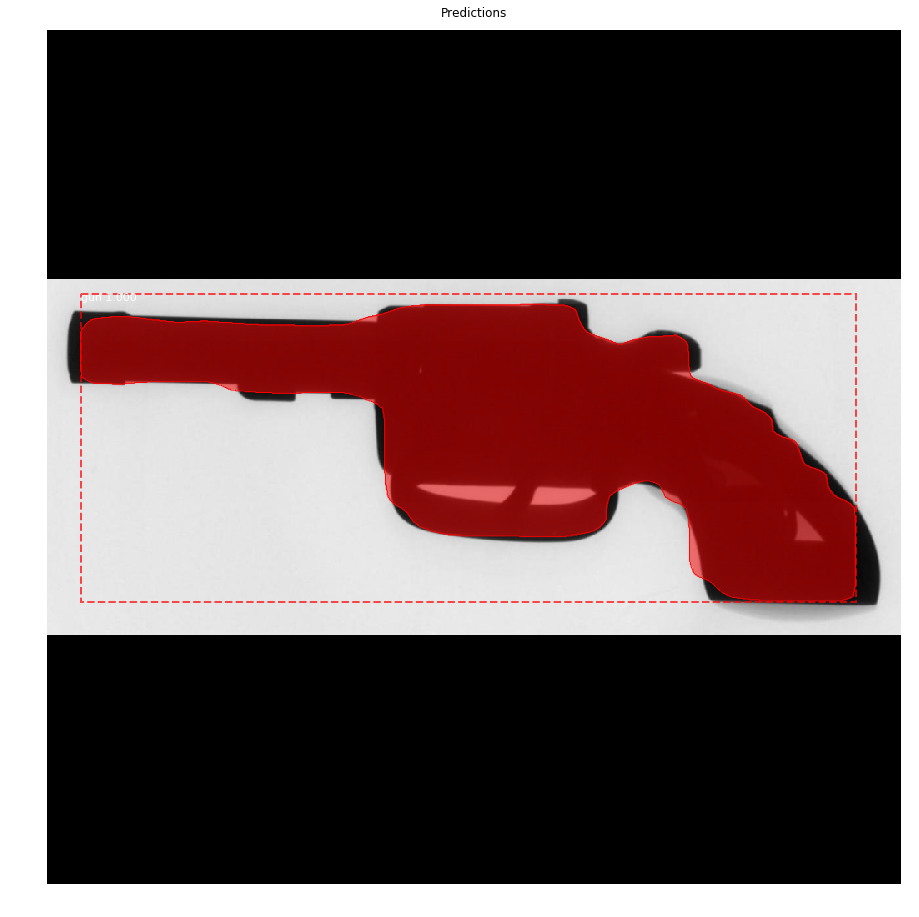

In [15]:
image_id = random.choice(dataset.image_ids)
#image_id = 1
image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, dataset.image_reference(image_id)))

#import cv2
#image = cv2.imread('./B0046_0041.png', cv2.IMREAD_COLOR)
#image = cv2.imread('./B0049_0033.png', cv2.IMREAD_COLOR)

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")

#print(r)
#log("gt_class_id", gt_class_id)
#log("gt_bbox", gt_bbox)
#log("gt_mask", gt_mask)

image_id = 2
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

results = model.detect([image], verbose=1)

ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

image ID: shuriken.B0046_0041.png (5) C:\Users\mmill\Documents\GitHub\Education\MaskRCnn\datasets/shuriken_gun\train\B0046_0041.png
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  253.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:  166.00000  max:  646.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool


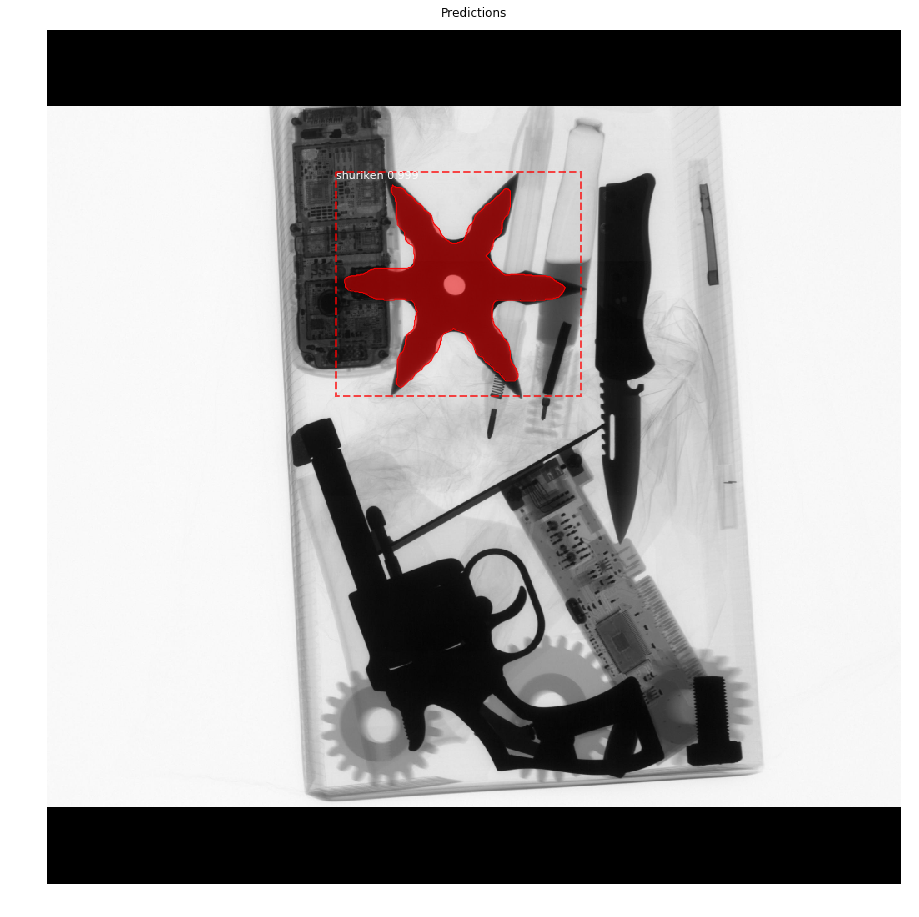

In [10]:
image_id = 5
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

results = model.detect([image], verbose=1)

ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

image ID: shuriken.B0046_0100.png (7) C:\Users\mmill\Documents\GitHub\Education\MaskRCnn\datasets/shuriken_gun\train\B0046_0100.png
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  253.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:  171.00000  max:  508.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool


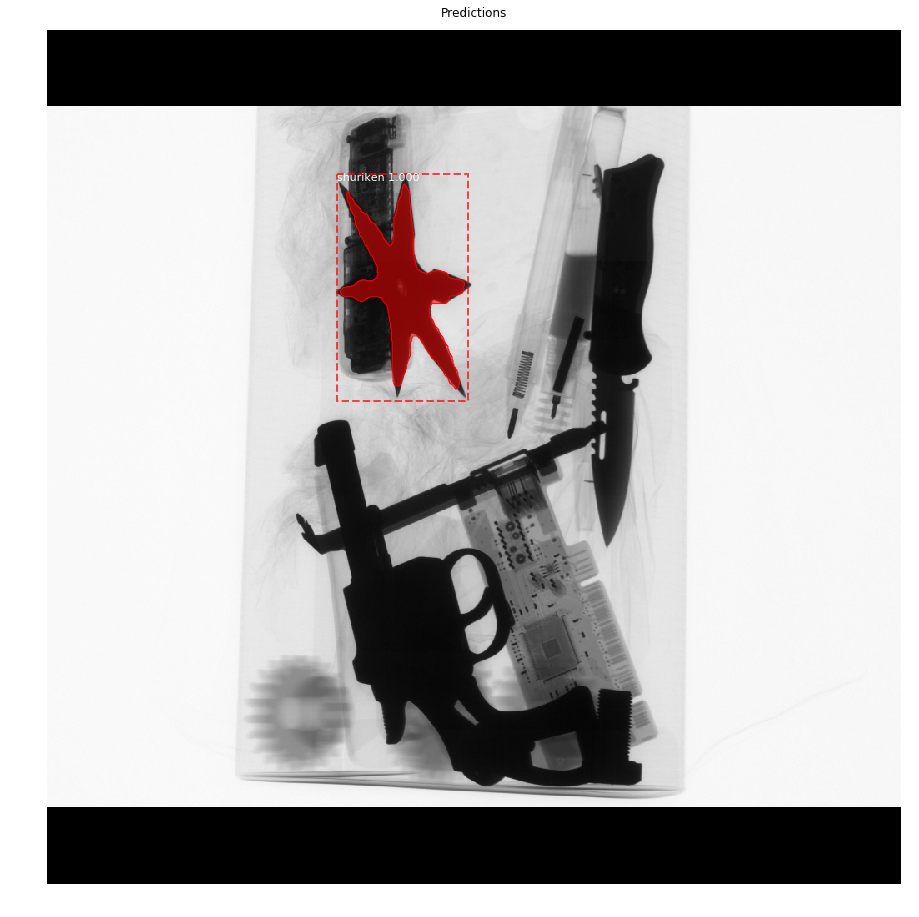

In [11]:
image_id = 7
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

results = model.detect([image], verbose=1)

ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

image ID: shuriken.B0046_0184.png (21) C:\Users\mmill\Documents\GitHub\Education\MaskRCnn\datasets/shuriken_gun\train\B0046_0184.png
Processing 1 images
image                    shape: (2208, 2688, 3)       min:    2.00000  max:  237.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  130.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 2688.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


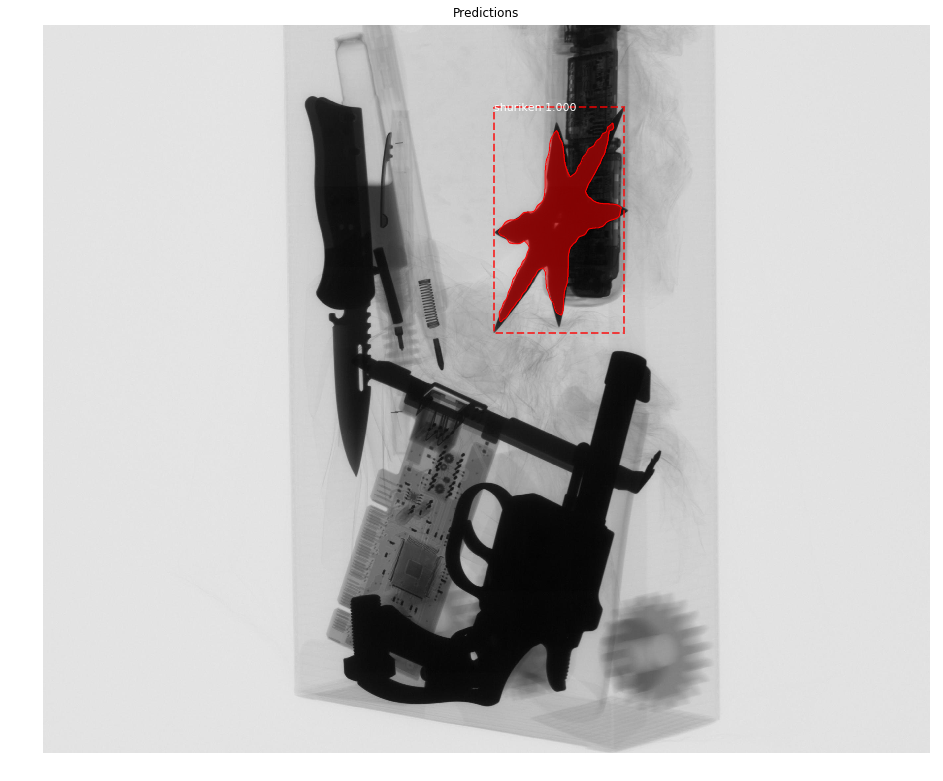

In [12]:
import cv2
image_id = 21
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

image = cv2.imread('./B0046_0102.png', cv2.IMREAD_COLOR)

results = model.detect([image], verbose=1)

ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")


[1. 1. 0.]
[0. 1. 1.]


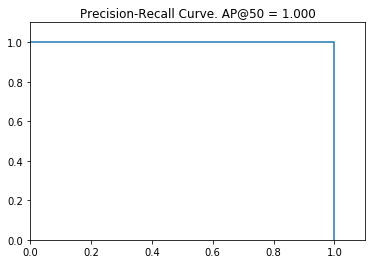

In [13]:
image_ids = np.random.choice(dataset.image_ids, 3)
APs = []
for image_id in image_ids:
    image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset, config,image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'], iou_threshold=0.50)
    
    APs.append(AP)
print(precisions)
print(recalls)

#prec = [1.0, 1.0, 1.0, 1.0, 0.7, 0.7, 0.7, 0.4, 0.4, 0.0, 0.0]
#rec =  [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
#prec.append
visualize.plot_precision_recall(AP, precisions, recalls)

In [14]:
mask_image = masked_image[y1:y2, x1:x2, :]
bbox_image = image[y1:y2, x1:x2, :]

print(mask_image.shape)
print(bbox_image.shape)

from matplotlib import pyplot as plt

test_img = bbox_image
test_img = cv2.copyMakeBorder(
                 test_img, 
                 10, 
                 10, 
                 10, 
                 10, 
                 cv2.BORDER_CONSTANT, 
                 value=(255,255,255)
              )

orig_img = mask_image
orig_img = cv2.copyMakeBorder(
                 orig_img, 
                 10, 
                 10, 
                 10, 
                 10, 
                 cv2.BORDER_CONSTANT, 
                 value=(255,255,255)
              )

cv2.imwrite("orig_mask.png", orig_img)
orig_img = cv2.imread("orig_mask.png", 0)
print("O Grayshape:" + str(orig_img.shape))

image_width = test_img.shape[1]
image_height = test_img.shape[0]

imgray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print("Grayshape:" + str(imgray.shape))

import skimage
contourImages = []
for k in range(len(contours)):
    X = []
    Y = []
    
    for i in range(len(contours[k])):
        #print(contours[0][i][0][0])
        X.append(int(round(contours[k][i][0][0])))
        Y.append(int(round(contours[k][i][0][1])))
    
    mask = np.zeros([image_height, image_width, 1], dtype=np.uint8)

    rr, cc = skimage.draw.polygon(Y, X)
    
    mask[rr, cc, 0] = 255
    mask = cv2.bitwise_not(mask)
    #cv2.imwrite("./testMasks/test" + str(k) + ".png", mask)
    #print(mask.shape)
    contourImages.append(mask)
    
    #plt_image = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    #cv2.drawContours(plt_image, contours, k, (0,255,0), 6)
    #plt.imshow(plt_image)
    #plt.title('my picture')
    #plt.show()
    
print("Performing Simil test")
plt_image = cv2.cvtColor(orig_img, cv2.COLOR_GRAY2RGB)
plt.imshow(orig_img)
plt.title("Orig")
plt.show()

from skimage.measure import compare_ssim as ssim
for i in range(len(contourImages)):
    c_image = contourImages[i]
    c_ssim = ssim(orig_img, c_image, data_range=c_image.max() - c_image.min())
    print("Simil: " + str(c_ssim))
    plt_image = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    plt.imshow(c_image)
    plt.title("Simil: " + str(c_ssim))
    plt.show()

NameError: name 'masked_image' is not defined

In [ ]:
#image_id = random.choice(dataset.image_ids)
#image_id = 1
#image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
#info = dataset.image_info[image_id]
#print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, dataset.image_reference(image_id)))

import cv2
#image = cv2.imread('./B0046_0041.png', cv2.IMREAD_COLOR)
image = cv2.imread('./B0049_0033.png', cv2.IMREAD_COLOR)

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")


print(len(r['masks']))
#log("gt_class_id", gt_class_id)
#log("gt_bbox", gt_bbox)
#log("gt_mask", gt_mask)

In [ ]:
print(len(r['masks']))

In [ ]:
print(len(r['masks'][0]))

In [ ]:
print(r['rois'])

In [ ]:
print(r['masks'][0][0])

In [ ]:
mask = r['masks']
x = len(r['masks'][0])
y = len(r['masks'])
print(x)
print(y)

In [ ]:

import cv2
#image = cv2.imread('./B0046_0041.png', cv2.IMREAD_COLOR)
image = cv2.imread('./B0049_0033.png', cv2.IMREAD_COLOR)

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
masked_image = visualize.display_masks_only(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")

y1, x1, y2, x2 = r['rois'][0]
masked_image = masked_image[y1:y2, x1:x2]

In [ ]:
x = len(masked_image)
print(masked_image.shape)

In [ ]:
print(image.shape)

In [ ]:
image2 = masked_image.astype(np.uint8)

cv2.imwrite('test.png', image2)

In [ ]:
import numpy as np 
only_mask = np.zeros(shape=masked_image.shape)
print(only_mask.shape)